In [101]:
!pwd

/Users/sangameshwaruppe/FY2026_January


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
data = pd.read_csv('covid_19_clean_complete.csv')

In [104]:
data.head

<bound method NDFrame.head of       Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27  

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [106]:
data.isnull().sum() # Check for missing values



Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [107]:
#EDA 

data.shape

(49068, 10)

In [108]:
data.Date.value_counts()

Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

In [109]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [110]:
data.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


In [111]:
#top 5 countries with highest confirmed cases
top5_confirmed = data.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(5)
print("Top 5 countries with highest confirmed cases:")
print(top5_confirmed)

Top 5 countries with highest confirmed cases:
Country/Region
US              4290259
Brazil          2442375
India           1480073
Russia           816680
South Africa     452529
Name: Confirmed, dtype: int64


In [112]:
# Grouping all countries based on their states so we will have 1 data for 1 country for 1 date
top=data[data["Date"]=="2020-01-22"]
top.head(60)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [113]:

top.groupby(by="Country/Region")[["Confirmed","Deaths","Recovered","Active"]].sum().reset_index()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,0,0,0,0
1,Albania,0,0,0,0
2,Algeria,0,0,0,0
3,Andorra,0,0,0,0
4,Angola,0,0,0,0
...,...,...,...,...,...
182,West Bank and Gaza,0,0,0,0
183,Western Sahara,0,0,0,0
184,Yemen,0,0,0,0
185,Zambia,0,0,0,0


In [114]:
data=data.groupby(by=["Date","Country/Region"])[["Confirmed","Deaths","Recovered","Active",]].sum().reset_index()
data  # New df after groupping all countries together

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0
...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791
35152,2020-07-27,Western Sahara,10,1,8,1
35153,2020-07-27,Yemen,1691,483,833,375
35154,2020-07-27,Zambia,4552,140,2815,1597


In [115]:
confirmed=data.groupby(by="Date")["Confirmed"].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


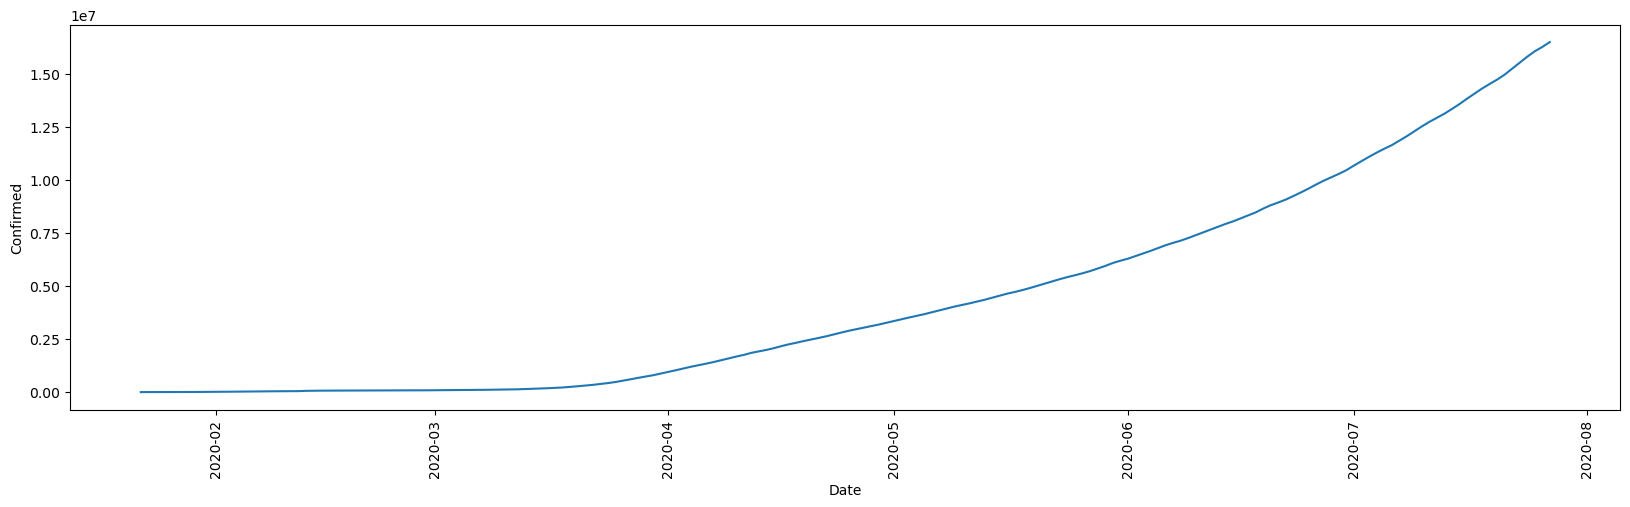

In [116]:
plt.figure(figsize=(20,5))
sns.lineplot(data=confirmed , x="Date", y="Confirmed")
plt.xticks(rotation=90)
plt.show()

In [117]:
Deaths=data.groupby(by="Date")["Deaths"].sum().reset_index()
Deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


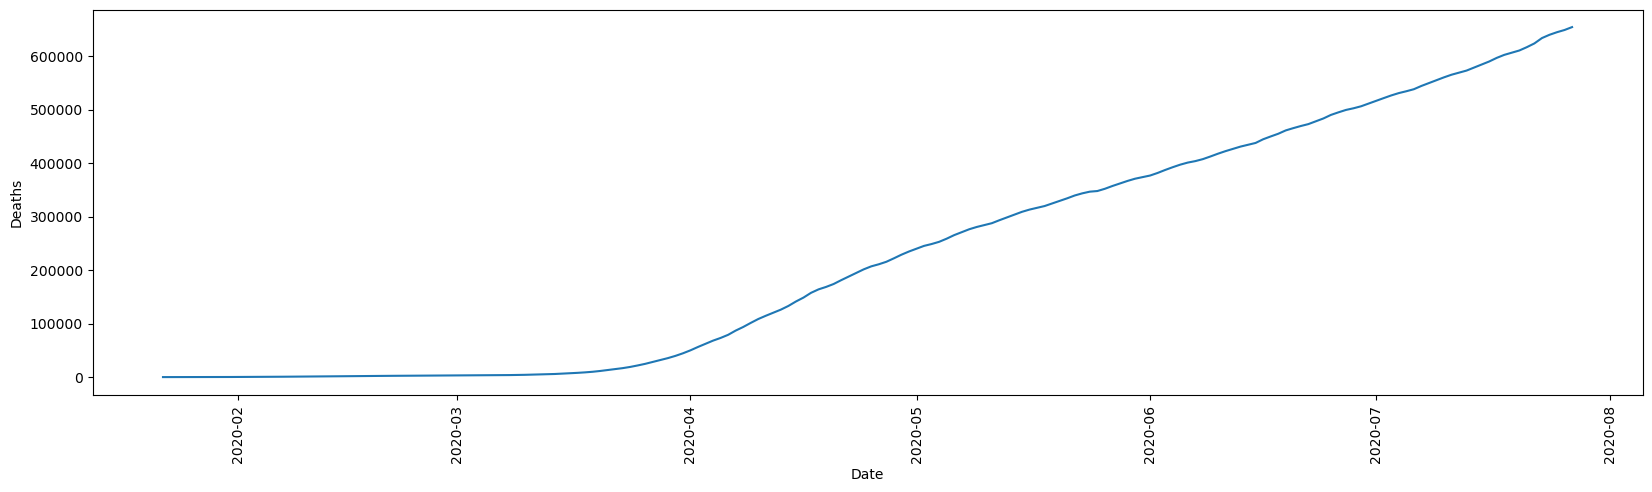

In [118]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Deaths , x="Date", y="Deaths")
plt.xticks(rotation=90)
plt.show()

In [119]:
Recovered=data.groupby(by="Date")["Recovered"].sum().reset_index()
Recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


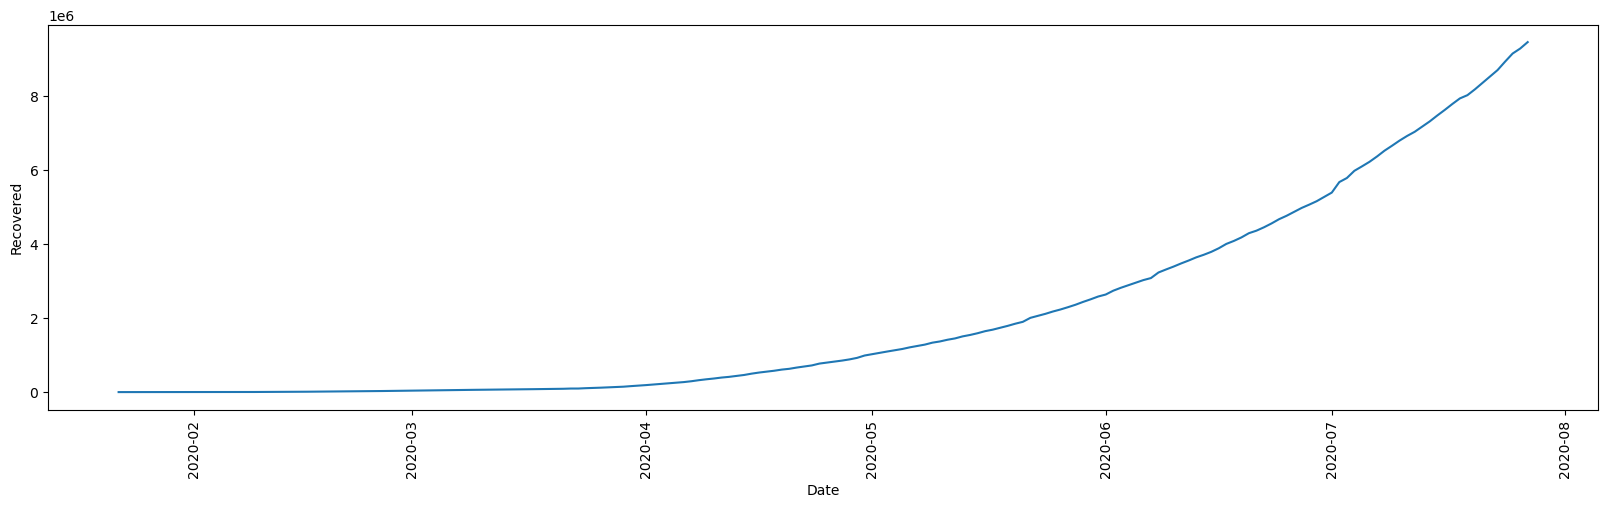

In [120]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Recovered , x="Date", y="Recovered")
plt.xticks(rotation=90)
plt.show()

In [121]:
Active=data.groupby(by="Date")["Active"].sum().reset_index()
Active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


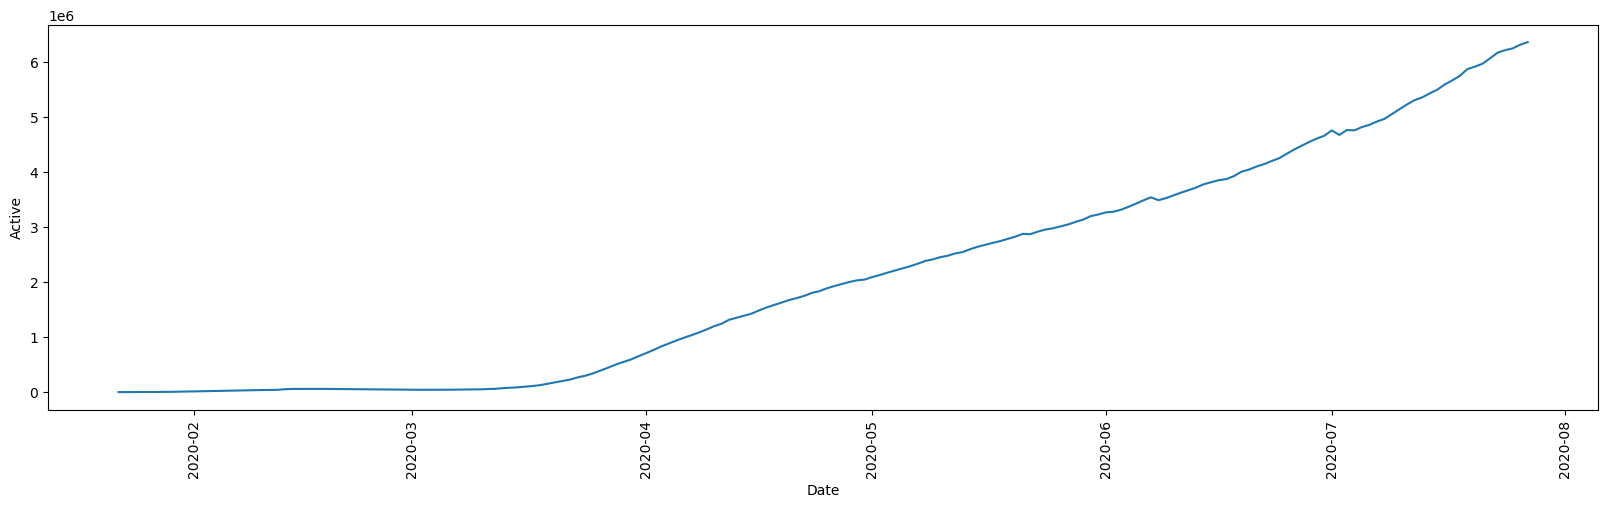

In [122]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Active , x="Date", y="Active")
plt.xticks(rotation=90)
plt.show()

In [123]:
# Top 10 conutries with most Active , Recovered , Confirmed and death cases
#use bar plot

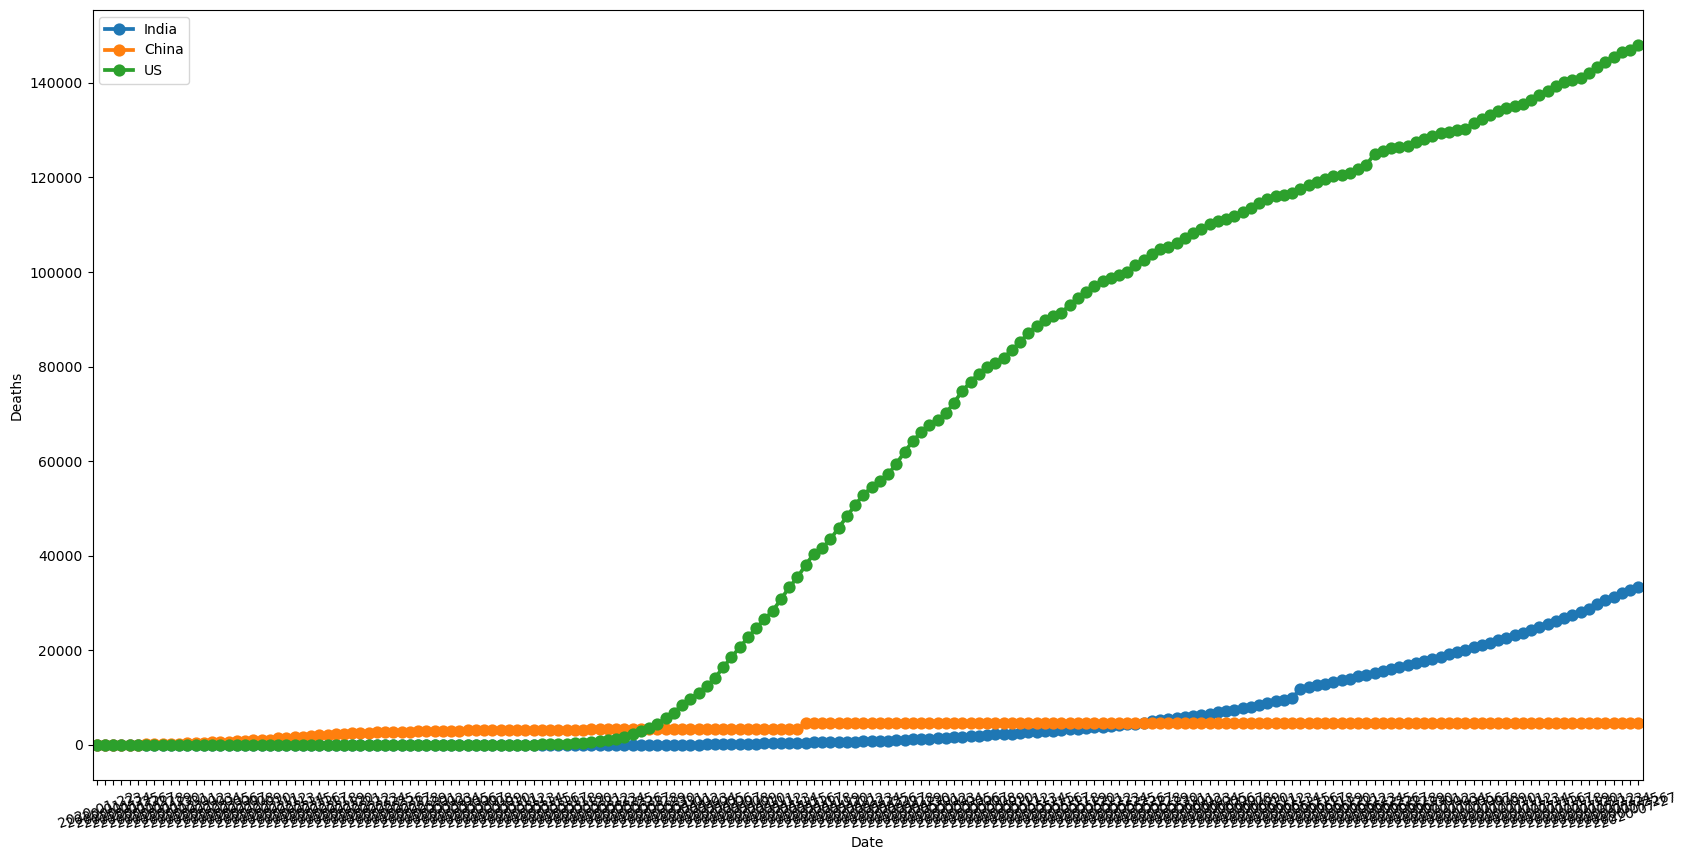

In [124]:
#Compare the death rate of India,china,US against time
countries = ['India', 'China', 'US']
plt.figure(figsize=(20,10))
for country in countries:
    country_data = data[data['Country/Region'] == country]
    sns.pointplot(data=country_data, x='Date', y='Deaths', label=country)
plt.xticks(rotation=20)
plt.show()


#  

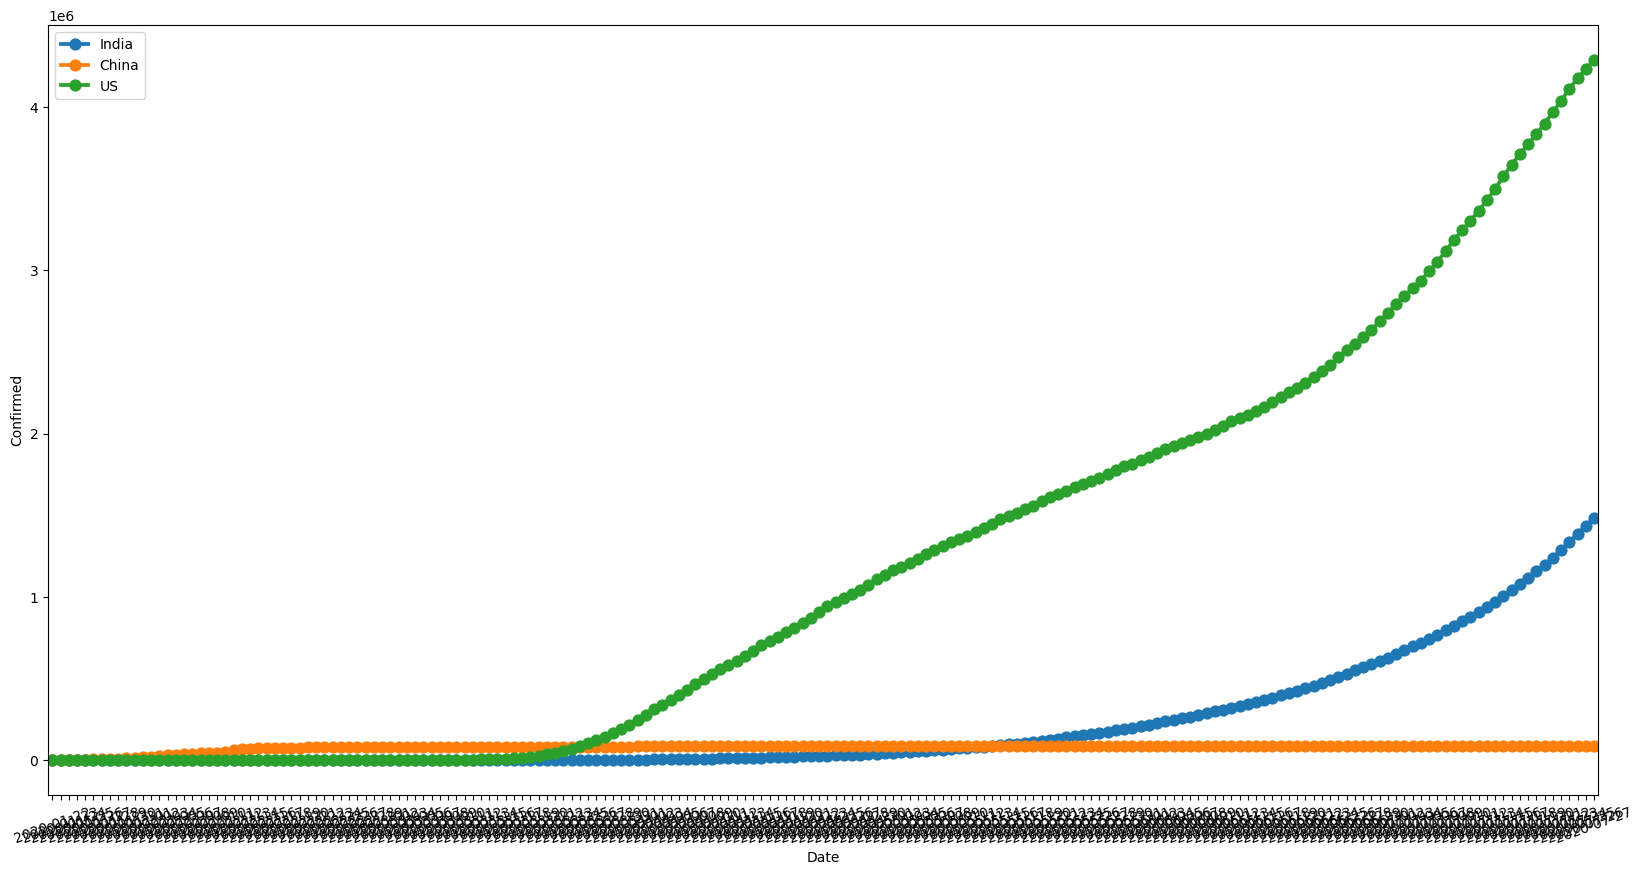

In [125]:
#can you fix the date axis to show only month and year
# Compare the confirmed cases of India,china,US against time
countries = ['India', 'China', 'US']
plt.figure(figsize=(20,10))
for country in countries:
    country_data = data[data['Country/Region'] == country]
    sns.pointplot(data=country_data, x='Date', y='Confirmed', label=country)
plt.xticks(rotation=20)
plt.show()

In [126]:
#time series analysis
data.set_index('Date', inplace=True)
data.index

DatetimeIndex(['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22',
               ...
               '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27',
               '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27',
               '2020-07-27', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=35156, freq=None)

In [127]:
#Time Series Forecasting using Prophet
confirmed  # 22nd Jan to 27th July
confirmed.columns=["ds","y"]
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
#pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [129]:
from prophet import Prophet
model=Prophet()
model.fit(confirmed)

12:28:30 - cmdstanpy - INFO - Chain [1] start processing
12:28:30 - cmdstanpy - INFO - Chain [1] done processing


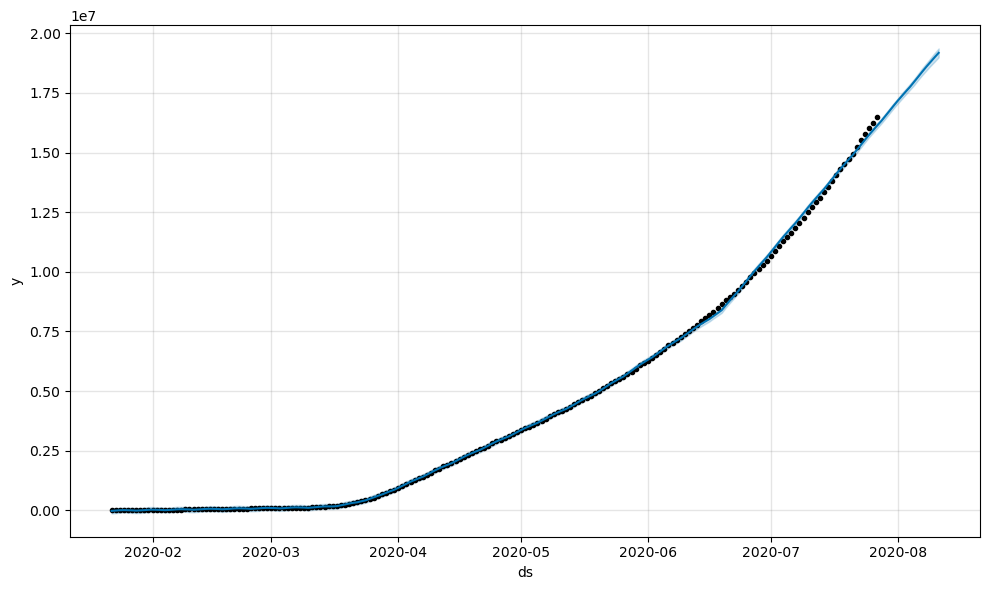

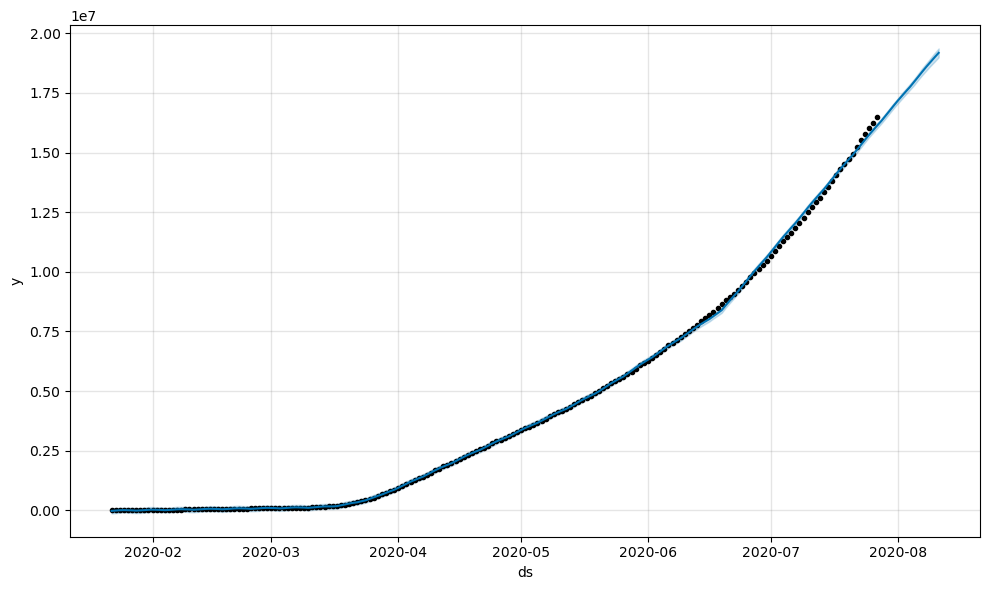

In [130]:
future = model.make_future_dataframe(periods=15)
model.predict(future)
model.plot(model.predict(future))

In [131]:
Deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


12:28:30 - cmdstanpy - INFO - Chain [1] start processing
12:28:30 - cmdstanpy - INFO - Chain [1] done processing


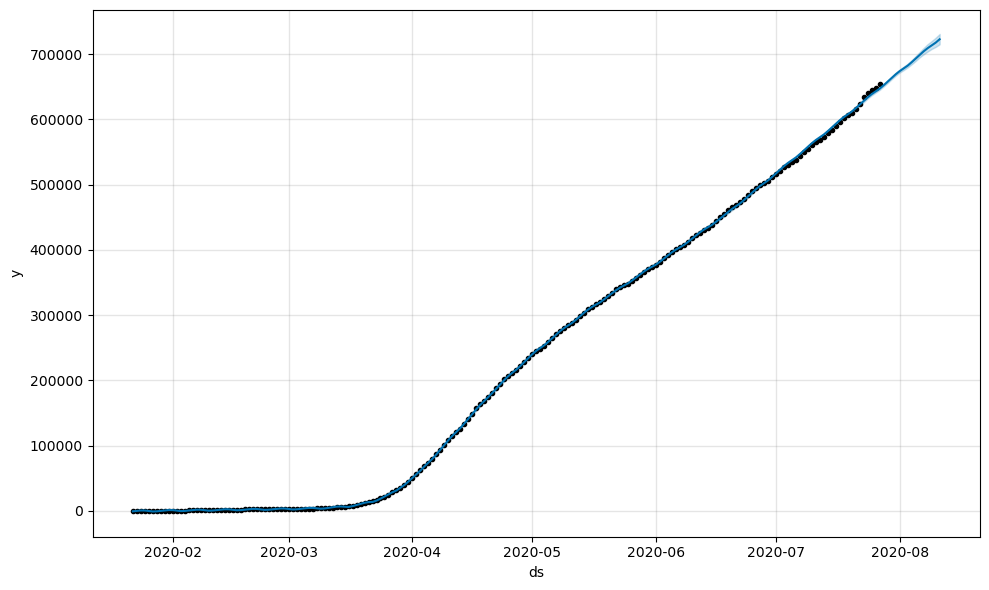

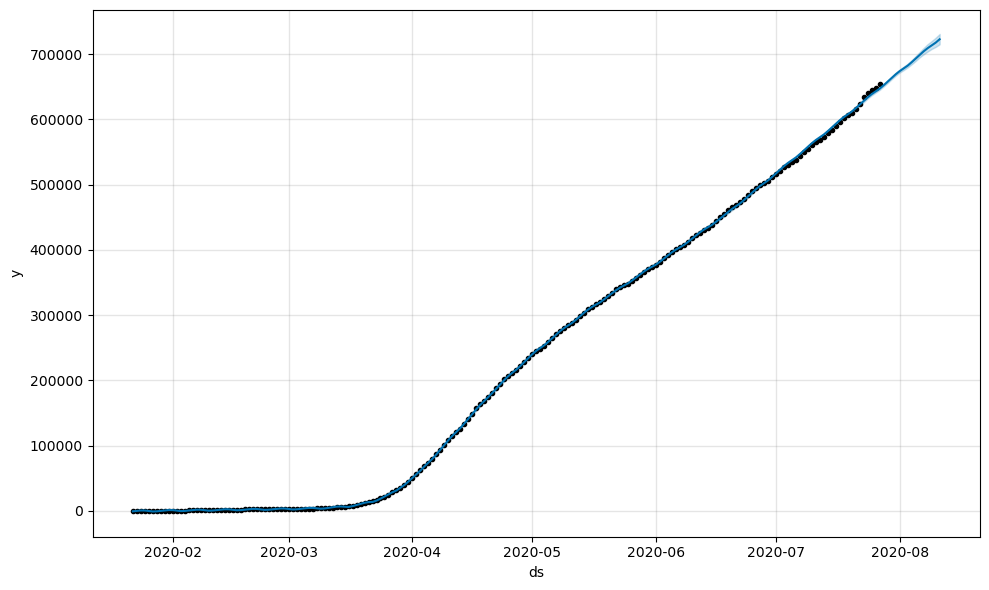

In [132]:
#Apply the Time Series Forecasting using Prophet on Deaths data,Active data and Recovered data as well.

Deaths.columns=["ds","y"]

#Deaths data
model_deaths=Prophet()
model_deaths.fit(Deaths)
model_deaths.predict(future)
model_deaths.plot(model_deaths.predict(future))

12:28:30 - cmdstanpy - INFO - Chain [1] start processing
12:28:30 - cmdstanpy - INFO - Chain [1] done processing


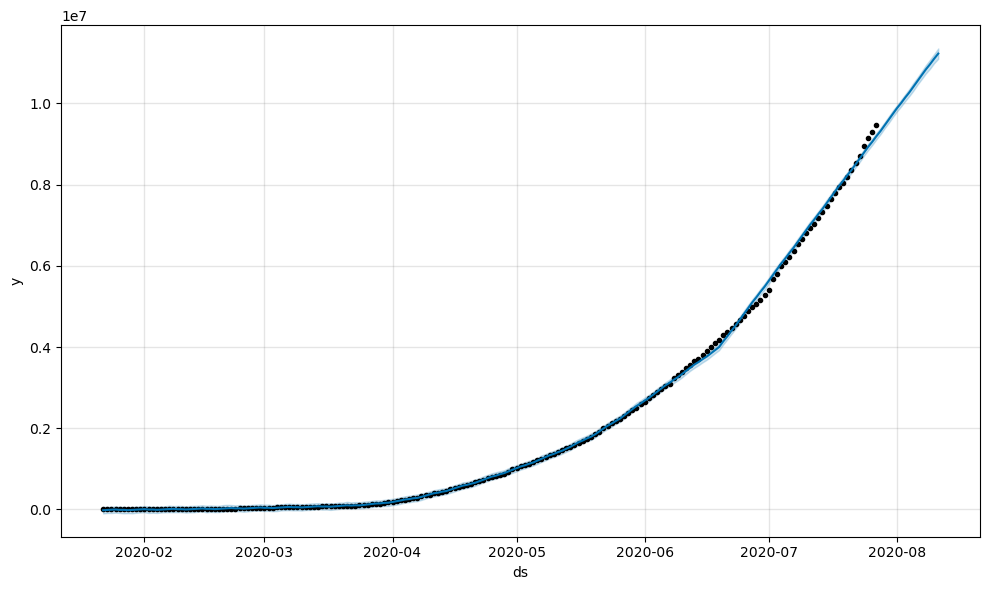

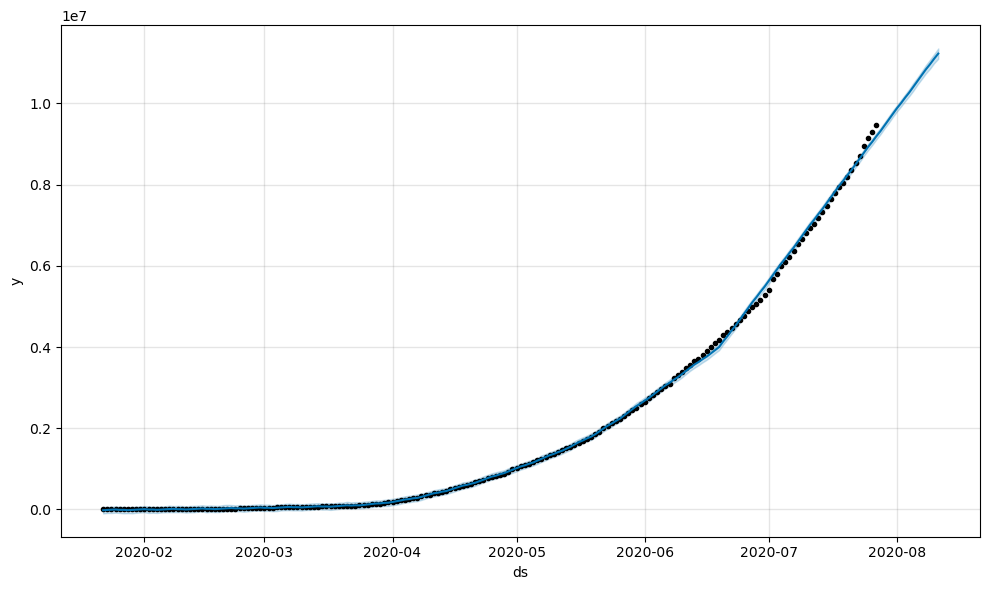

In [133]:
#Active data
Recovered.columns=["ds","y"]
model_active=Prophet()
model_active.fit(Recovered)
model_active.predict(future)
model_active.plot(model_active.predict(future))


12:28:31 - cmdstanpy - INFO - Chain [1] start processing
12:28:31 - cmdstanpy - INFO - Chain [1] done processing


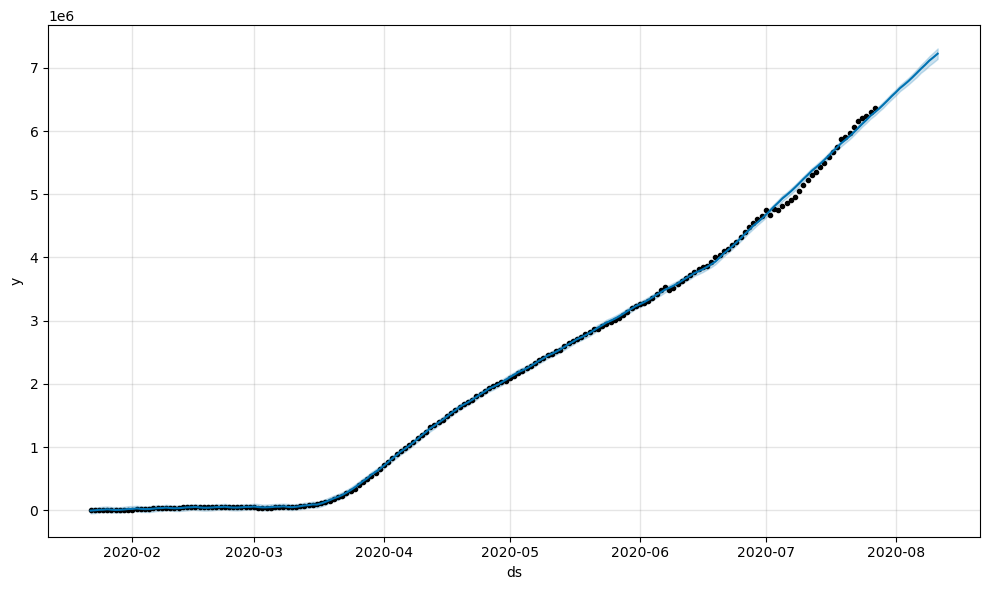

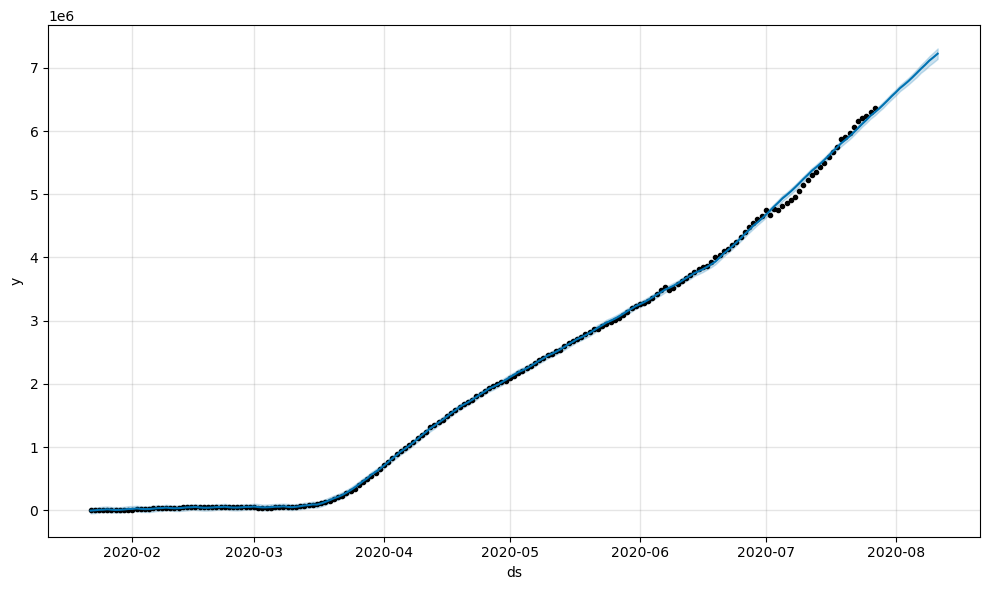

In [134]:
#Active data
Active.columns=["ds","y"]
model_active=Prophet()
model_active.fit(Active)
model_active.predict(future)
model_active.plot(model_active.predict(future))

In [137]:
import plotly.express as px

In [138]:
world_data = data.groupby(by="Country/Region")[["Confirmed" ,"Active" , "Deaths" ,"Recovered"]].sum().reset_index()
world_data

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [139]:
figure= px.choropleth(world_data , locations="Country/Region" ,locationmode="country names" , color="Active",
                      hover_name="Country/Region",title="Countries with most Active cases")
figure.show()